In [1]:
import pandas as pd

num_img_training = 500 # 202599
#root= "/content/drive/My Drive/Colab Notebooks/Exam2/"
df = pd.read_csv("celeba-dataset/list_attr_celeba.csv")
df = df.iloc[:num_img_training,:41]
df = df.replace([-1],0)
df = df[["image_id","Wearing_Lipstick","Wavy_Hair","Attractive","Young"]]
df

,image_id,Wearing_Lipstick,Wavy_Hair,Attractive,Young
0,000001.jpg,1,0,1,1
1,000002.jpg,0,0,0,1
2,000003.jpg,0,1,0,1
3,000004.jpg,1,0,1,1
4,000005.jpg,1,0,1,1
...,...,...,...,...,...
495,000496.jpg,1,0,1,1
496,000497.jpg,1,1,1,1
497,000498.jpg,0,0,0,0
498,000499.jpg,1,0,0,1


In [2]:
from keras_preprocessing.image import ImageDataGenerator

columns = list(df.iloc[:num_img_training,1:41].columns)
train_dir = "G:\\Alpha_Projects\\AI\\Exam\\celeba-dataset\\img_align_celeba"


datagen=ImageDataGenerator(rescale=1./255.,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.5,horizontal_flip=True, fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255.)

train_div = int(num_img_training*0.7)
test_div  = int(num_img_training*0.9)

train_generator=datagen.flow_from_dataframe(
dataframe=df[:train_div],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(178,218))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[train_div:test_div],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(178,218))

test_generator=test_datagen.flow_from_dataframe(
dataframe=df[test_div:],
directory=train_dir,
validate_filenames=True,
x_col="image_id",
color_mode='rgb',
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(178,218))

C:\ProgramData\Miniconda3\envs\JCastillo\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Found 350 validated image filenames.
Found 100 validated image filenames.
Found 50 validated image filenames.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import regularizers, optimizers

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(178,218,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(columns), activation='sigmoid'))
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 218, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 178, 218, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 216, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 176, 216, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 108, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 88, 108, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 88, 108, 64)       1

In [4]:
from keras.callbacks import ModelCheckpoint

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

checkpointer = ModelCheckpoint(filepath="celeba_model1.h5",monitor='val_accuracy',verbose=0, save_best_only=True,mode='max', period=1)

h=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
10/10 [==============================] - 7s 741ms/step - loss: 0.7240 - accuracy: 0.2704 - val_loss: 0.6522 - val_accuracy: 0.2188
Epoch 2/100
10/10 [==============================] - 4s 366ms/step - loss: 0.6592 - accuracy: 0.2138 - val_loss: 0.6609 - val_accuracy: 0.2083
Epoch 3/100
10/10 [==============================] - 4s 350ms/step - loss: 0.6546 - accuracy: 0.2075 - val_loss: 0.6641 - val_accuracy: 0.2292
Epoch 4/100
10/10 [==============================] - 4s 353ms/step - loss: 0.6422 - accuracy: 0.2013 - val_loss: 0.6654 - val_accuracy: 0.2292
Epoch 5/100
10/10 [==============================] - 4s 363ms/step - loss: 0.6433 - accuracy: 0.1981 - val_loss: 0.6616 - val_accuracy: 0.2083
Epoch 6/100
10/10 [==============================] - 4s 350ms/step - loss: 0.6503 - accuracy: 0.2044 - val_loss: 0.6721 - val_accuracy: 0.2188
Epoch 7/100
10/10 [==============================] - 4s 353ms/step

10/10 [==============================] - 3s 345ms/step - loss: 0.5794 - accuracy: 0.2107 - val_loss: 0.5485 - val_accuracy: 0.2396
Epoch 56/100
10/10 [==============================] - 3s 343ms/step - loss: 0.5889 - accuracy: 0.1981 - val_loss: 0.5661 - val_accuracy: 0.2083
Epoch 57/100
10/10 [==============================] - 3s 339ms/step - loss: 0.5716 - accuracy: 0.2138 - val_loss: 0.5568 - val_accuracy: 0.2396
Epoch 58/100
10/10 [==============================] - 4s 359ms/step - loss: 0.5787 - accuracy: 0.2013 - val_loss: 0.5460 - val_accuracy: 0.2292
Epoch 59/100
10/10 [==============================] - 4s 373ms/step - loss: 0.5848 - accuracy: 0.2390 - val_loss: 0.5627 - val_accuracy: 0.2396
Epoch 60/100
10/10 [==============================] - 3s 349ms/step - loss: 0.5826 - accuracy: 0.2044 - val_loss: 0.5618 - val_accuracy: 0.2188
Epoch 61/100
10/10 [==============================] - 3s 346ms/step - loss: 0.5865 - accuracy: 0.2107 - val_loss: 0.5712 - val_accuracy: 0.2188
Epoch

In [5]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred >0.5)

predictions = pred_bool.astype(int)
#columns=["desert", "mountains", "sea", "sunset", "trees"]
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["image_id"]=test_generator.filenames
ordered_cols=["image_id"]+columns
results=results[ordered_cols]#To get the same column order
results.to_csv("results.csv",index=False)

Instructions for updating:
Please use Model.predict, which supports generators.
50/50 [==============================] - 1s 12ms/step


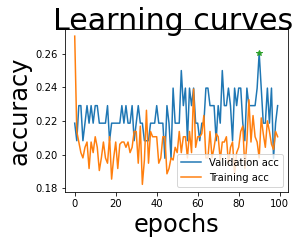

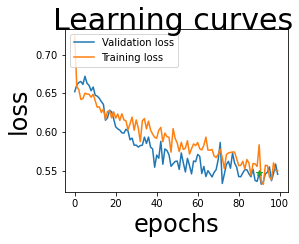

In [6]:
import numpy as np
import matplotlib.pyplot as plt

epoch_max = np.argmax(h.history['val_accuracy'])
plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_accuracy'], label='Validation acc')
plt.plot(h.history['accuracy'], label='Training acc')
plt.legend(loc='lower right')
plt.plot(epoch_max, h.history['val_accuracy'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('accuracy',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_loss'], label='Validation loss')
plt.plot(h.history['loss'], label='Training loss')
plt.legend(loc='upper left')
plt.plot(epoch_max, h.history['val_loss'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('loss',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.show()

In [7]:
df1=pd.DataFrame(results["image_id"])

for column in columns:
    df1[column] = np.where(df.iloc[test_div:,1:41].reset_index(drop=True)[column] == results[column], 1, 0)

In [8]:
df1.sum()

image_id            000451.jpg000452.jpg000453.jpg000454.jpg000455...
Wearing_Lipstick                                                   43
Wavy_Hair                                                          33
Attractive                                                         41
Young                                                              41
dtype: object

In [9]:
df = pd.read_csv("celeba-dataset/list_attr_celeba.csv")
df = df.replace([-1],0)
df = df[["image_id","Wearing_Lipstick","Wavy_Hair","Attractive","Young"]]
df.iloc[test_div:num_img_training,1:41].sum()

Wearing_Lipstick    29
Wavy_Hair           18
Attractive          30
Young               40
dtype: int64

In [10]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(178,218, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 178, 218, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 178, 218, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 178, 218, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 89, 109, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 89, 109, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 89, 109, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 44, 54, 128)       0     

In [11]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 178, 218, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 178, 218, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 178, 218, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 89, 109, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 89, 109, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 89, 109, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 44, 54, 128)       0     

In [12]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(conv_base)
model.add(layers.BatchNormalization())
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 6, 512)         14714688  
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 6, 512)         2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 6, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 61444     
Total params: 14,778,180
Trainable params: 7,141,892
Non-trainable params: 7,636,288
_________________________________________________________________


In [13]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [14]:
#Training and validation stages
h = model.fit(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN, #70
      epochs= 100,
      validation_data=valid_generator,
      validation_steps=STEP_SIZE_VALID,
      workers=0,
      max_queue_size=0)

Epoch 1/100
10/10 [==============================] - 6s 616ms/step - loss: 0.7635 - accuracy: 0.2547 - val_loss: 0.5648 - val_accuracy: 0.3021
Epoch 2/100
10/10 [==============================] - 5s 455ms/step - loss: 0.6083 - accuracy: 0.3239 - val_loss: 0.5617 - val_accuracy: 0.4896
Epoch 3/100
10/10 [==============================] - 5s 455ms/step - loss: 0.5755 - accuracy: 0.3302 - val_loss: 0.5345 - val_accuracy: 0.5938
Epoch 4/100
10/10 [==============================] - 5s 456ms/step - loss: 0.5502 - accuracy: 0.3019 - val_loss: 0.4822 - val_accuracy: 0.4896
Epoch 5/100
10/10 [==============================] - 5s 467ms/step - loss: 0.5387 - accuracy: 0.3145 - val_loss: 0.5556 - val_accuracy: 0.5521
Epoch 6/100
10/10 [==============================] - 5s 460ms/step - loss: 0.5120 - accuracy: 0.3375 - val_loss: 0.4604 - val_accuracy: 0.5208
Epoch 7/100
10/10 [==============================] - 5s 467ms/step - loss: 0.4996 - accuracy: 0.3711 - val_loss: 0.4731 - val_accuracy: 0.3958

Epoch 58/100
10/10 [==============================] - 5s 456ms/step - loss: 0.1896 - accuracy: 0.5063 - val_loss: 0.7259 - val_accuracy: 0.3854
Epoch 59/100
10/10 [==============================] - 5s 456ms/step - loss: 0.2222 - accuracy: 0.5189 - val_loss: 0.8377 - val_accuracy: 0.4583
Epoch 60/100
10/10 [==============================] - 5s 454ms/step - loss: 0.1930 - accuracy: 0.5063 - val_loss: 0.9867 - val_accuracy: 0.5521
Epoch 61/100
10/10 [==============================] - 5s 457ms/step - loss: 0.1956 - accuracy: 0.5314 - val_loss: 0.7244 - val_accuracy: 0.6042
Epoch 62/100
10/10 [==============================] - 5s 455ms/step - loss: 0.1720 - accuracy: 0.4906 - val_loss: 0.6976 - val_accuracy: 0.6146
Epoch 63/100
10/10 [==============================] - 5s 457ms/step - loss: 0.1900 - accuracy: 0.5157 - val_loss: 0.6593 - val_accuracy: 0.5208
Epoch 64/100
10/10 [==============================] - 5s 466ms/step - loss: 0.1992 - accuracy: 0.5755 - val_loss: 0.7360 - val_accuracy:

In [15]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred >0.5)

predictions = pred_bool.astype(int)
results=pd.DataFrame(predictions, columns=columns)
results["image_id"]=test_generator.filenames
ordered_cols=["image_id"]+columns
results=results[ordered_cols]
results.to_csv("results2.csv",index=False)

50/50 [==============================] - 0s 7ms/step


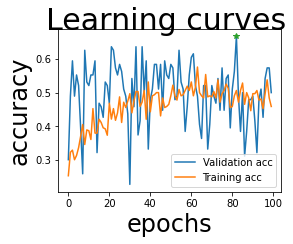

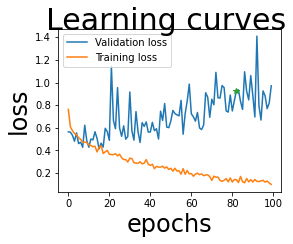

In [16]:
import numpy as np
import matplotlib.pyplot as plt

epoch_max = np.argmax(h.history['val_accuracy'])
plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_accuracy'], label='Validation acc')
plt.plot(h.history['accuracy'], label='Training acc')
plt.legend(loc='lower right')
plt.plot(epoch_max, h.history['val_accuracy'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('accuracy',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.figure(num=None, figsize=(4,3))
plt.plot(h.history['val_loss'], label='Validation loss')
plt.plot(h.history['loss'], label='Training loss')
plt.legend(loc='upper left')
plt.plot(epoch_max, h.history['val_loss'][epoch_max],'*')
plt.xlabel('epochs',fontsize=24)
plt.ylabel('loss',fontsize=24)
plt.suptitle('Learning curves', fontsize=30)

plt.show()

In [17]:
df1=pd.DataFrame(results["image_id"])
df = df[["image_id","Wearing_Lipstick","Wavy_Hair","Attractive","Young"]]
for column in columns:
    df1[column] = np.where(df.iloc[test_div:num_img_training,1:41].reset_index(drop=True)[column] == results[column], 1, 0)
df1.sum()

image_id            000451.jpg000452.jpg000453.jpg000454.jpg000455...
Wearing_Lipstick                                                   47
Wavy_Hair                                                          39
Attractive                                                         34
Young                                                              42
dtype: object

In [32]:
from keras.models import Model
inp = Input(shape = (178,218,3))
x = Conv2D(32, (3, 3), padding = 'same')(conv_base.input)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
output1 = Dense(1, activation = 'sigmoid')(x)
output2 = Dense(1, activation = 'sigmoid')(x)
output3 = Dense(1, activation = 'sigmoid')(x)
output4 = Dense(1, activation = 'sigmoid')(x)

model = Model(conv_base.input,[output1,output2,output3,output4])

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 178, 218, 3) 0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 178, 218, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 89, 109, 32)  0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 89, 109, 32)  128         max_pooling2d_8[0][0]            
_______________________________________________________________________________________

In [35]:
from keras import optimizers
model.compile(optimizers.RMSprop(lr = 0.0001, decay = 1e-6),
loss = ["binary_crossentropy","binary_crossentropy","binary_crossentropy","binary_crossentropy",],metrics = ["accuracy"])

In [60]:
def generator_wrapper(generator):
    for batch_x,batch_y in generator:
        yield (batch_x,[batch_y[:,i] for i in range(len(columns))])

In [62]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

checkpointer = ModelCheckpoint(filepath="test_celeba_model3.h5",monitor='val_accuracy',verbose=0, save_best_only=True,mode='max', period=1)

h = model.fit_generator(generator=generator_wrapper(train_generator),
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=100)
validation_data=generator_wrapper(valid_generator)

Epoch 1/100
10/10 [==============================] - 3s 287ms/step - loss: 2.8362 - dense_34_loss: 0.7560 - dense_35_loss: 0.6491 - dense_36_loss: 0.8385 - dense_37_loss: 0.5927 - dense_34_accuracy: 0.6352 - dense_35_accuracy: 0.6698 - dense_36_accuracy: 0.5377 - dense_37_accuracy: 0.7201
Epoch 2/100
10/10 [==============================] - 3s 269ms/step - loss: 2.9364 - dense_34_loss: 0.7263 - dense_35_loss: 0.6995 - dense_36_loss: 0.7525 - dense_37_loss: 0.7580 - dense_34_accuracy: 0.6006 - dense_35_accuracy: 0.7044 - dense_36_accuracy: 0.6321 - dense_37_accuracy: 0.6918
Epoch 3/100
10/10 [==============================] - 3s 272ms/step - loss: 3.1077 - dense_34_loss: 0.7962 - dense_35_loss: 0.7428 - dense_36_loss: 0.8192 - dense_37_loss: 0.7493 - dense_34_accuracy: 0.6069 - dense_35_accuracy: 0.6761 - dense_36_accuracy: 0.5346 - dense_37_accuracy: 0.7013
Epoch 4/100
10/10 [==============================] - 3s 265ms/step - loss: 2.6965 - dense_34_loss: 0.7411 - dense_35_loss: 0.6231 

10/10 [==============================] - 3s 280ms/step - loss: 2.4116 - dense_34_loss: 0.5628 - dense_35_loss: 0.5391 - dense_36_loss: 0.7229 - dense_37_loss: 0.5867 - dense_34_accuracy: 0.6950 - dense_35_accuracy: 0.7075 - dense_36_accuracy: 0.6289 - dense_37_accuracy: 0.7264
Epoch 29/100
10/10 [==============================] - 3s 282ms/step - loss: 2.5820 - dense_34_loss: 0.6304 - dense_35_loss: 0.6430 - dense_36_loss: 0.7536 - dense_37_loss: 0.5550 - dense_34_accuracy: 0.7013 - dense_35_accuracy: 0.7107 - dense_36_accuracy: 0.5975 - dense_37_accuracy: 0.7484
Epoch 30/100
10/10 [==============================] - 3s 271ms/step - loss: 2.4693 - dense_34_loss: 0.5745 - dense_35_loss: 0.6159 - dense_36_loss: 0.6690 - dense_37_loss: 0.6099 - dense_34_accuracy: 0.7201 - dense_35_accuracy: 0.7013 - dense_36_accuracy: 0.6069 - dense_37_accuracy: 0.7516
Epoch 31/100
10/10 [==============================] - 3s 281ms/step - loss: 2.3331 - dense_34_loss: 0.5577 - dense_35_loss: 0.5868 - dense_3

10/10 [==============================] - 3s 284ms/step - loss: 2.3773 - dense_34_loss: 0.5899 - dense_35_loss: 0.5922 - dense_36_loss: 0.6906 - dense_37_loss: 0.5045 - dense_34_accuracy: 0.6855 - dense_35_accuracy: 0.7327 - dense_36_accuracy: 0.6195 - dense_37_accuracy: 0.7673
Epoch 57/100
10/10 [==============================] - 3s 272ms/step - loss: 2.2549 - dense_34_loss: 0.5377 - dense_35_loss: 0.5549 - dense_36_loss: 0.6495 - dense_37_loss: 0.5128 - dense_34_accuracy: 0.7516 - dense_35_accuracy: 0.7264 - dense_36_accuracy: 0.6226 - dense_37_accuracy: 0.7767
Epoch 58/100
10/10 [==============================] - 3s 272ms/step - loss: 2.3287 - dense_34_loss: 0.5584 - dense_35_loss: 0.5451 - dense_36_loss: 0.6635 - dense_37_loss: 0.5616 - dense_34_accuracy: 0.6981 - dense_35_accuracy: 0.7233 - dense_36_accuracy: 0.6321 - dense_37_accuracy: 0.7484
Epoch 59/100
10/10 [==============================] - 3s 271ms/step - loss: 2.4345 - dense_34_loss: 0.5701 - dense_35_loss: 0.6291 - dense_3

10/10 [==============================] - 3s 269ms/step - loss: 2.4323 - dense_34_loss: 0.6236 - dense_35_loss: 0.6042 - dense_36_loss: 0.6927 - dense_37_loss: 0.5118 - dense_34_accuracy: 0.6981 - dense_35_accuracy: 0.7453 - dense_36_accuracy: 0.6289 - dense_37_accuracy: 0.7736
Epoch 85/100
10/10 [==============================] - 3s 267ms/step - loss: 2.3621 - dense_34_loss: 0.5947 - dense_35_loss: 0.5681 - dense_36_loss: 0.6878 - dense_37_loss: 0.5115 - dense_34_accuracy: 0.6981 - dense_35_accuracy: 0.7138 - dense_36_accuracy: 0.6069 - dense_37_accuracy: 0.7830
Epoch 86/100
10/10 [==============================] - 3s 267ms/step - loss: 2.2493 - dense_34_loss: 0.5338 - dense_35_loss: 0.6083 - dense_36_loss: 0.6243 - dense_37_loss: 0.4828 - dense_34_accuracy: 0.7013 - dense_35_accuracy: 0.7201 - dense_36_accuracy: 0.6321 - dense_37_accuracy: 0.7547
Epoch 87/100
10/10 [==============================] - 3s 266ms/step - loss: 2.3636 - dense_34_loss: 0.5322 - dense_35_loss: 0.5823 - dense_3

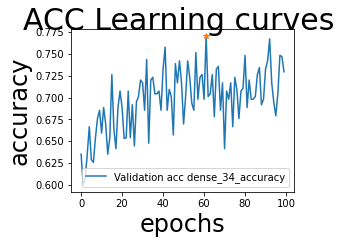

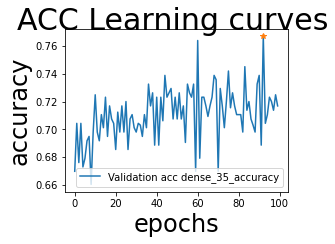

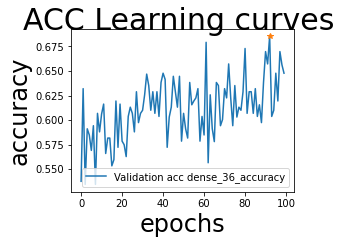

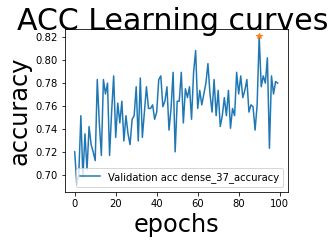

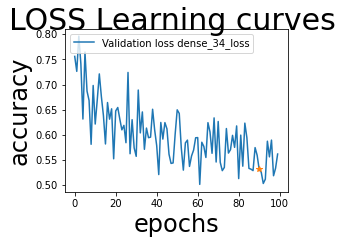

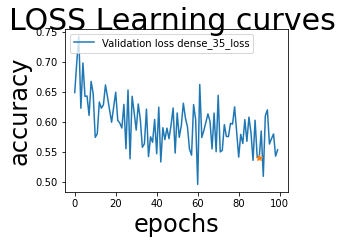

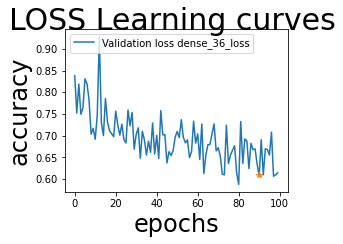

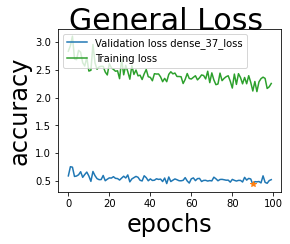

In [78]:
accuracyList=list(h.history.keys())[5:]
lossList=list(h.history.keys())[1:5]

for key in accuracyList:
    epoch_max = np.argmax(h.history[key])
    plt.figure(num=None, figsize=(4,3))
    plt.plot(h.history[key], label='Validation acc'+" "+key)
    #plt.plot(h.history['accuracy'], label='Training acc')
    plt.legend(loc='lower right')
    plt.plot(epoch_max, h.history[key][epoch_max],'*')
    plt.xlabel('epochs',fontsize=24)
    plt.ylabel('accuracy',fontsize=24)
    plt.suptitle('ACC Learning curves', fontsize=30)

for key in lossList:
    plt.figure(num=None, figsize=(4,3))
    plt.plot(h.history[key], label='Validation loss'+" "+key)
    plt.legend(loc='upper left')
    plt.plot(epoch_max, h.history[key][epoch_max],'*')
    plt.xlabel('epochs',fontsize=24)
    plt.ylabel('accuracy',fontsize=24)
    plt.suptitle('LOSS Learning curves', fontsize=30)
    
plt.plot(h.history['loss'], label='Training loss')
plt.legend(loc='upper left')
plt.suptitle('General Loss', fontsize=30)

plt.show()

In [80]:
import numpy as np

predictions = [(x > 0.5).astype(int) for x in pred]
predictions = np.reshape(predictions,(num_img_training-int(num_img_training*0.9), len(columns)))

results3=pd.DataFrame(predictions, columns=columns)
results3["image_id"]=test_generator.filenames
ordered_cols=["image_id"]+columns
results3=results3[ordered_cols]
results3.to_csv("results3.csv",index=False)

In [81]:
df1=pd.DataFrame(results["image_id"])
df = df[["image_id","Wearing_Lipstick","Wavy_Hair","Attractive","Young"]]
for column in columns:
    df1[column] = np.where(df.iloc[test_div:num_img_training,1:41].reset_index(drop=True)[column] == results[column], 1, 0)
df1.sum()

image_id            000451.jpg000452.jpg000453.jpg000454.jpg000455...
Wearing_Lipstick                                                   47
Wavy_Hair                                                          39
Attractive                                                         34
Young                                                              42
dtype: object